# **Sentiment Analysis User Review ☹**

Project Akhir Mata Kuliah Pemograman Bahasa Alami yang beranggotakan : </br>

*   Najmi Fadhilah Atsari 2103110233
*   Natania Adela Surya Aggraini 2103112020
*   Wahyu 2103113577 

Dataset Latih : https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Untuk penjelasan lebih lanjut kunjungi GitHub Saya : https://github.com/d0ubleyuu/NLP---IMDB-User-Review-Sentiment-Analysis-ML

#### **Install & Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning 
import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns', None)

#### **Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = "/content/drive/MyDrive/Colab Notebooks/dataset/IMDB Dataset.csv"
df = pd.read_csv(filename, encoding = 'latin-1', nrows=10000)
print("Jumlah Baris = " + str(len(df["review"])))
df.head(10)

Jumlah Baris = 10000


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive

# **Preprocessing Data**

#### **Case Folding & Filtering**

In [ ]:
import string
import re

In [ ]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x))
df['label'] = df['sentiment'].replace({'positive': 1, 'negative': 0})
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. The filming tec...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        cleaned_text  label  
0  one of the other reviewers has mentioned that ...      1  
1  a wonderful little production  the filming tec...      1  
2  i thought this was a wonderful way to spend ti...      1  
3  basically there s a family where a little boy ...      0  
4  petter mattei s  love in the time of money  is...      1

<h4><b> Menambah Fitur - Menghitung Length, persentase tanda baca </b></h4>

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['review_len'] = df['review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(x))
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. The filming tec...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        cleaned_text  label  review_len  punct  
0  one of the other reviewers has mentioned that ...      1        1425    4.2  
1  a wonderful little production  the filming tec...      1         807    3.2  
2  i thought this was a wonderful way to spend ti...      1         741    3.8  
3  basically there s a family where a little boy ...      0         581    4.1  
4  petter mattei s  love in the time of money  is...      1        1048    3.1

#### **Tokenization**

In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. The filming tec...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        cleaned_text  label  review_len  \
0  one of the other reviewers has mentioned that ...      1        1425   
1  a wonderful little production  the filming tec...      1         807   
2  i thought this was a wonderful way to spend ti...      1         741   
3  basically there s a family where a little boy ...      0         581   
4  petter mattei s  love in the time of money  is...      1        1048   

   punct                                             tokens  
0    4.2  [one, of, the, other, reviewers, has, mentione...  
1    3.2  [a, wonderful, little, production, the, filmin...  
2    3.8  [i, thought, this, was, a, wonderful, way, to,...  
3    4.1  [basically, there, s, a, family, where, a, lit...  
4    3.1  [petter, mattei, s, love, in, the, time, of, m...

#### **Stopword Remowal & Lemmatization**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. The filming tec...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        cleaned_text  label  review_len  \
0  one of the other reviewers has mentioned that ...      1        1425   
1  a wonderful little production  the filming tec...      1         807   
2  i thought this was a wonderful way to spend ti...      1         741   
3  basically there s a family where a little boy ...      0         581   
4  petter mattei s  love in the time of money  is...      1        1048   

   punct                                             tokens  \
0    4.2  [one, of, the, other, reviewers, has, mentione...   
1    3.2  [a, wonderful, little, production, the, filmin...   
2    3.8  [i, thought, this, was, a, wonderful, way, to,...   
3    4.1  [basically, there, s, a, family, where, a, lit...   
4    3.1  [petter, mattei, s, love, in, the, time, of, m...   

                                   lemmatized_review  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...

#### **Visualisasi Data**

In [ ]:
#Shape of the dataset, and breakdown of the classes
print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"Sentimen Positive = {len(df[df['sentiment']=='positive'])} rows")
print(f"Sentimen Negative = {len(df[df['sentiment']=='negative'])} rows")

Input data has 10000 rows and 8 columns
Sentimen Positive = 5028 rows
Sentimen Negative = 4972 rows


Number of null in label: 0
Number of null in text: 0


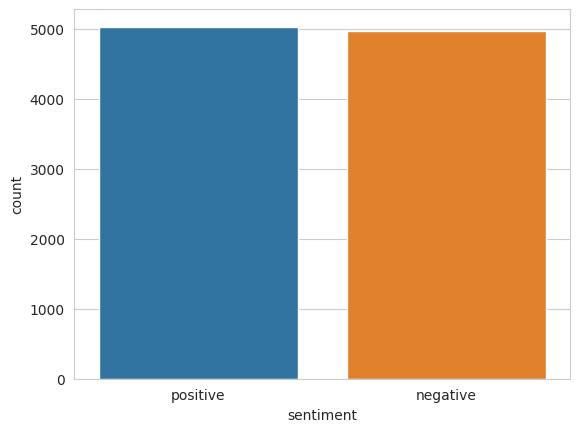

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { df['sentiment'].isnull().sum() }")
print(f"Number of null in text: { df['review'].isnull().sum()}")
sns.countplot(x='sentiment', data=df);

In [ ]:
from wordcloud import WordCloud

In [ ]:
negativedf = df[ (df['sentiment']=='positive')]
positivedf = df[ (df['sentiment']=='negative')]

negative_list= negativedf['lemmatized_review'].tolist()
positive_list= positivedf['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

#### **Perhitungan TF-IDF**

In [ ]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(10000, 3)
(10000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 3)
(3000, 3)
(7000,)
(3000,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

X_train_vect.head() 

review_len  punct    0    1    2    3    4    5    6    7    8    9   10  \
0        1027    2.9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1         698    2.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2         228    5.3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3        1477    2.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4         524    2.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    11   12   13   14   15   16   17   18   19   20   21   22   23   24   25  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    26   27   28   29   30   31   32   33   34   35   36   37   38   39   40  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    41   42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    56   57   58   59   60   61   62   63   64   65   66   67   68   69   70  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    71   72   73   74   75   76   77   78   79   80   81   82   83   84   85  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    86   87   88   89   90   91   92   93        94   95   96   97   98   99  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.098021  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   

   100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1

#### **Algorithm Application**
Menggunakan Algoritma Multinominal Naive Bayes dari SKLearn

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1495
           1       0.83      0.86      0.85      1505

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



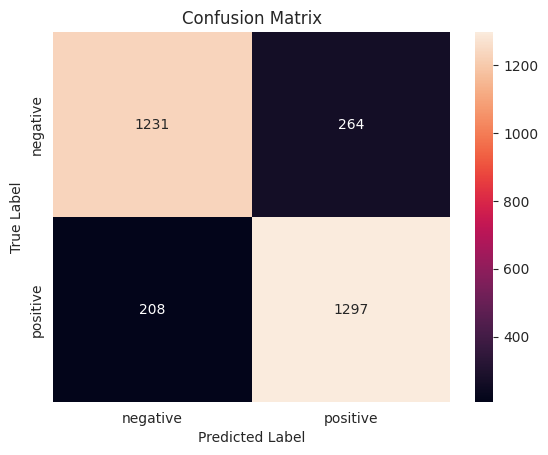

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

models = [ MultinomialNB() ]
names = ["Naive Bayes"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.8344285714285714 
 precision - 0.828600081689164 
 recall - 0.8467132371877414 
 f1 - 0.8373365789338465 



#### **Predictions**

In [ ]:
filename = "/content/drive/MyDrive/Colab Notebooks/dataset/Scrapping_Ivanna.csv"
reviewdf = pd.read_csv(filename, encoding = 'latin-1')
print("Jumlah Baris = " + str(len(reviewdf["UserReview"])))
reviewdf.head(10)

NameError: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 10)
# from sklearn.ensemble import ExtraTreesClassifier
# classifier = ExtraTreesClassifier(n_estimators=150, random_state=50)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.883

In [ ]:
data = reviewdf["lemmatized_review"]
vect = tfidf.transform(data).toarray()

reviewdf['predictions'] = classifier.predict(vect)
reviewdf.head()

Rating                                         UserReview  \
0       8  This is a Very Good Horror Movie better than D...   
1       7  BLOODY SLASHER! Good bloody slasher. Camerawor...   
2       4  Another awful entry in an all-around awful ser...   
3       6  Pretty okay, though somewhat repetitive The pl...   
4       4  It's just another ordinary horror movie. The s...   

                                        cleaned_text  \
0  this is a very good horror movie better than d...   
1  bloody slasher  good bloody slasher  camerawor...   
2  another awful entry in an all around awful ser...   
3  pretty okay  though somewhat repetitive the pl...   
4  it s just another ordinary horror movie  the s...   

                                              tokens  \
0  ['this', 'is', 'a', 'very', 'good', 'horror', ...   
1  ['bloody', 'slasher', 'good', 'bloody', 'slash...   
2  ['another', 'awful', 'entry', 'in', 'an', 'all...   
3  ['pretty', 'okay', 'though', 'somewhat', 'repe...   
4  ['it', 's', 'just', 'another', 'ordinary', 'ho...   

                                   lemmatized_review  predictions  
0  ['good', 'horror', 'movie', 'better', 'danur',...            1  
1  ['bloody', 'slasher', 'good', 'bloody', 'slash...            0  
2  ['another', 'awful', 'entry', 'around', 'awful...            0  
3  ['pretty', 'okay', 'though', 'somewhat', 'repe...            0  
4  ['another', 'ordinary', 'horror', 'movie', 'st...            0

Number of null in label: 0


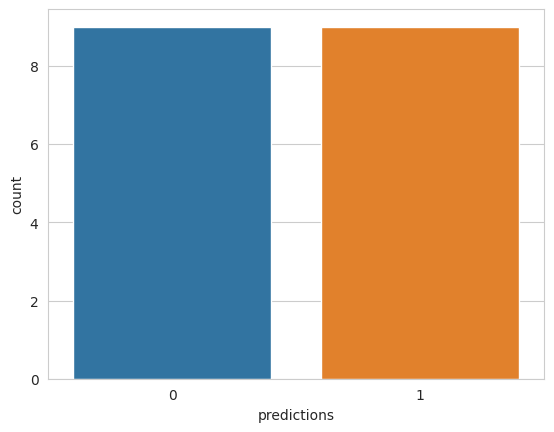

In [ ]:
# Missing values in the dataset
print(f"Number of null in label: { reviewdf['predictions'].isnull().sum() }")
sns.countplot(x='predictions', data=reviewdf);

In [ ]:
df_negative = reviewdf[ (reviewdf['predictions']==1) ]
df_positive = reviewdf[ (reviewdf['predictions']==0) ]
#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()
     

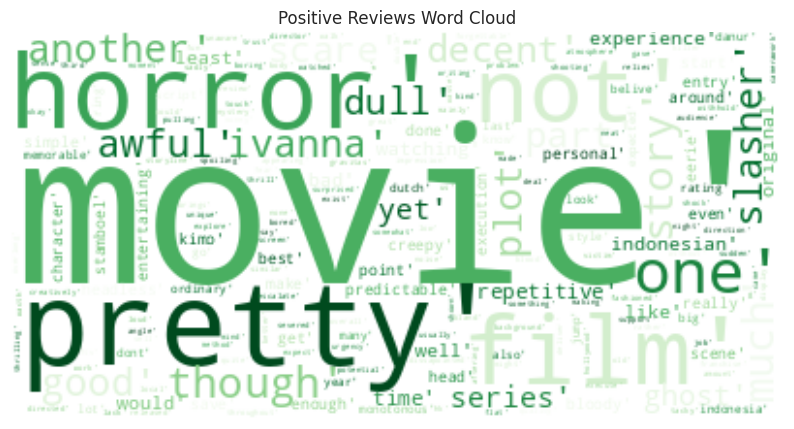

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

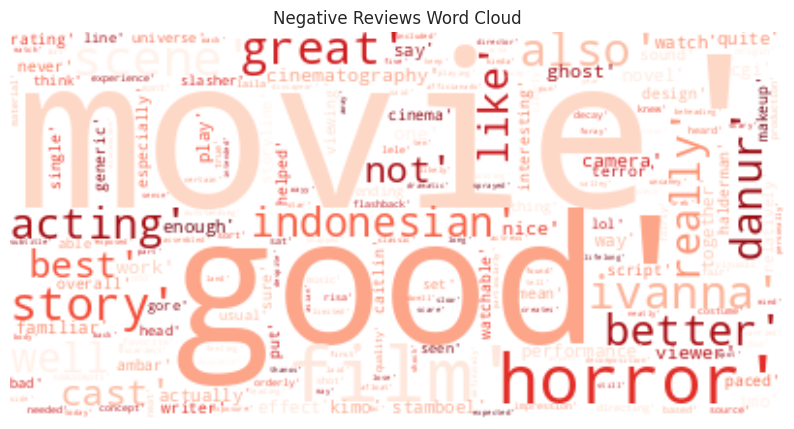

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()